# Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
data = pd.read_csv('play_tennis.csv')
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [3]:
data.drop('day', axis = 1, inplace = True)
data.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


## One Hot Encoding the data

In [4]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,outlook_Rain,outlook_Sunny,temp_Hot,temp_Mild,humidity_Normal,wind_Weak,play_Yes
0,0,1,1,0,0,1,0
1,0,1,1,0,0,0,0
2,0,0,1,0,0,1,1
3,1,0,0,1,0,1,1
4,1,0,0,0,1,1,1


## Seperate X and y

In [5]:
X = data.drop(['play_Yes'], axis = 1)
y = data['play_Yes']

In [6]:
X.head()

,outlook_Rain,outlook_Sunny,temp_Hot,temp_Mild,humidity_Normal,wind_Weak
0,0,1,1,0,0,1
1,0,1,1,0,0,0
2,0,0,1,0,0,1
3,1,0,0,1,0,1
4,1,0,0,0,1,1


In [7]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: play_Yes, dtype: uint8

## Divide the data into train test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Fit Decision tree on X_train, y_trian

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [44]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Plot the tree

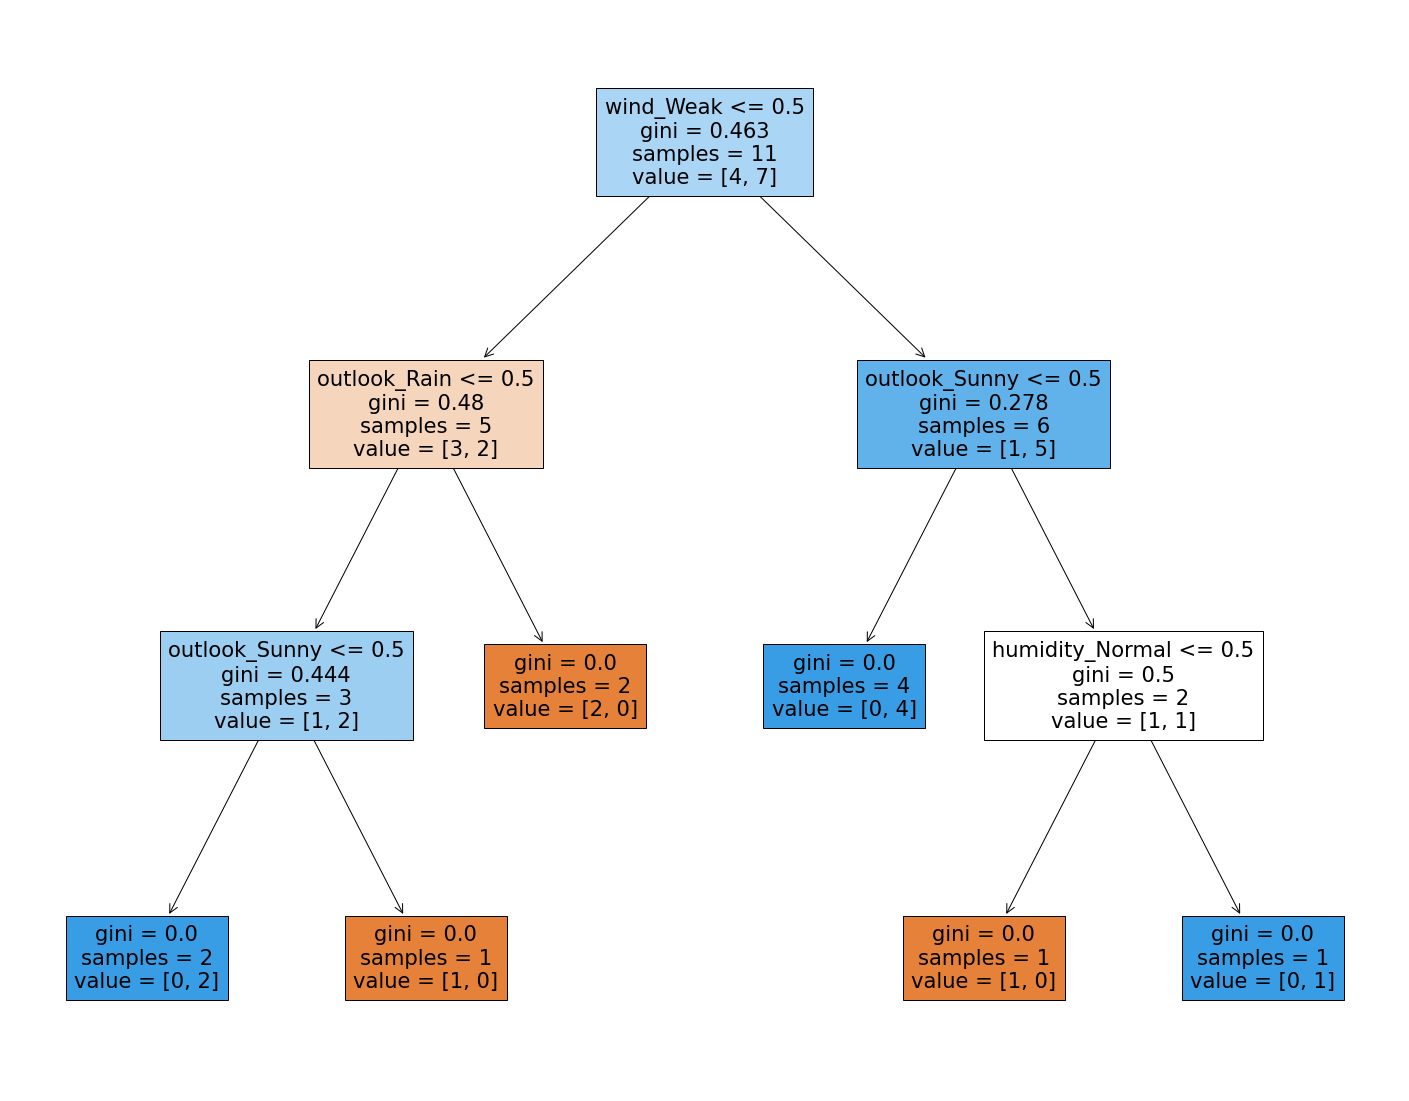

In [45]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,
                   filled=True)

## Fittig the tree with entropy

- The default criterion used to split the decision tree is the gini index method
- In order to change the criterion the split the decision tree to entropy method set the criterion parameter to 'entropy'

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

In [47]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

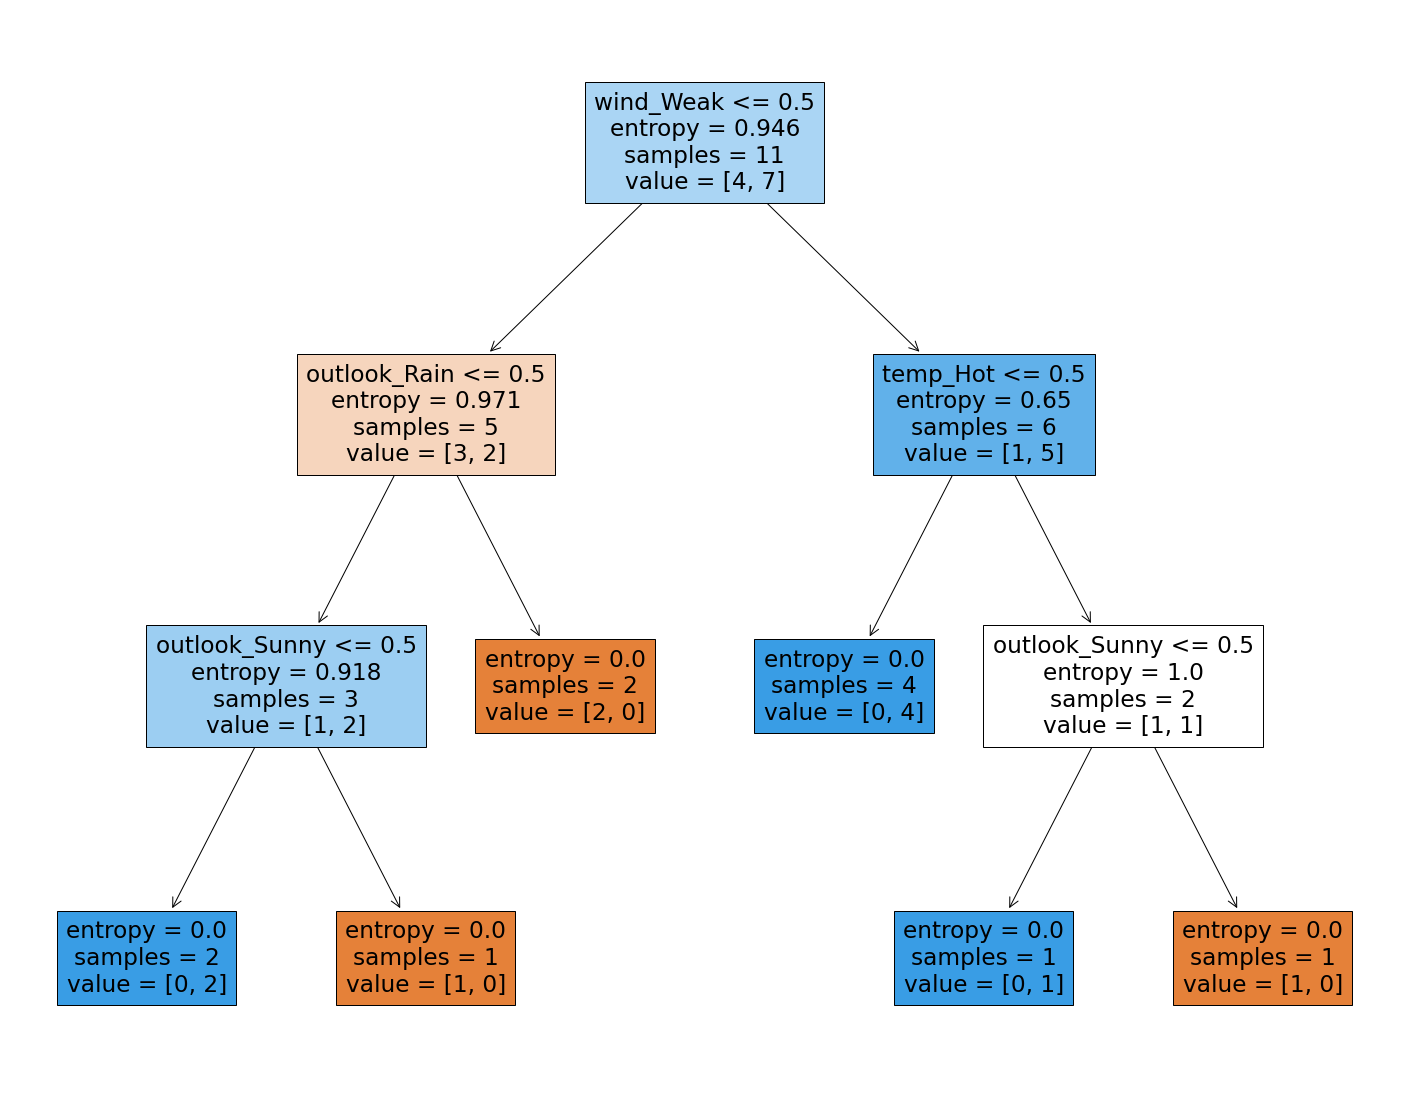

In [48]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,
                   filled=True)

## Controlling the growth of the tree

## Max depth parameter
- The default value is set to none. If we go with the default value then leads to overfitting  

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 2)

In [56]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

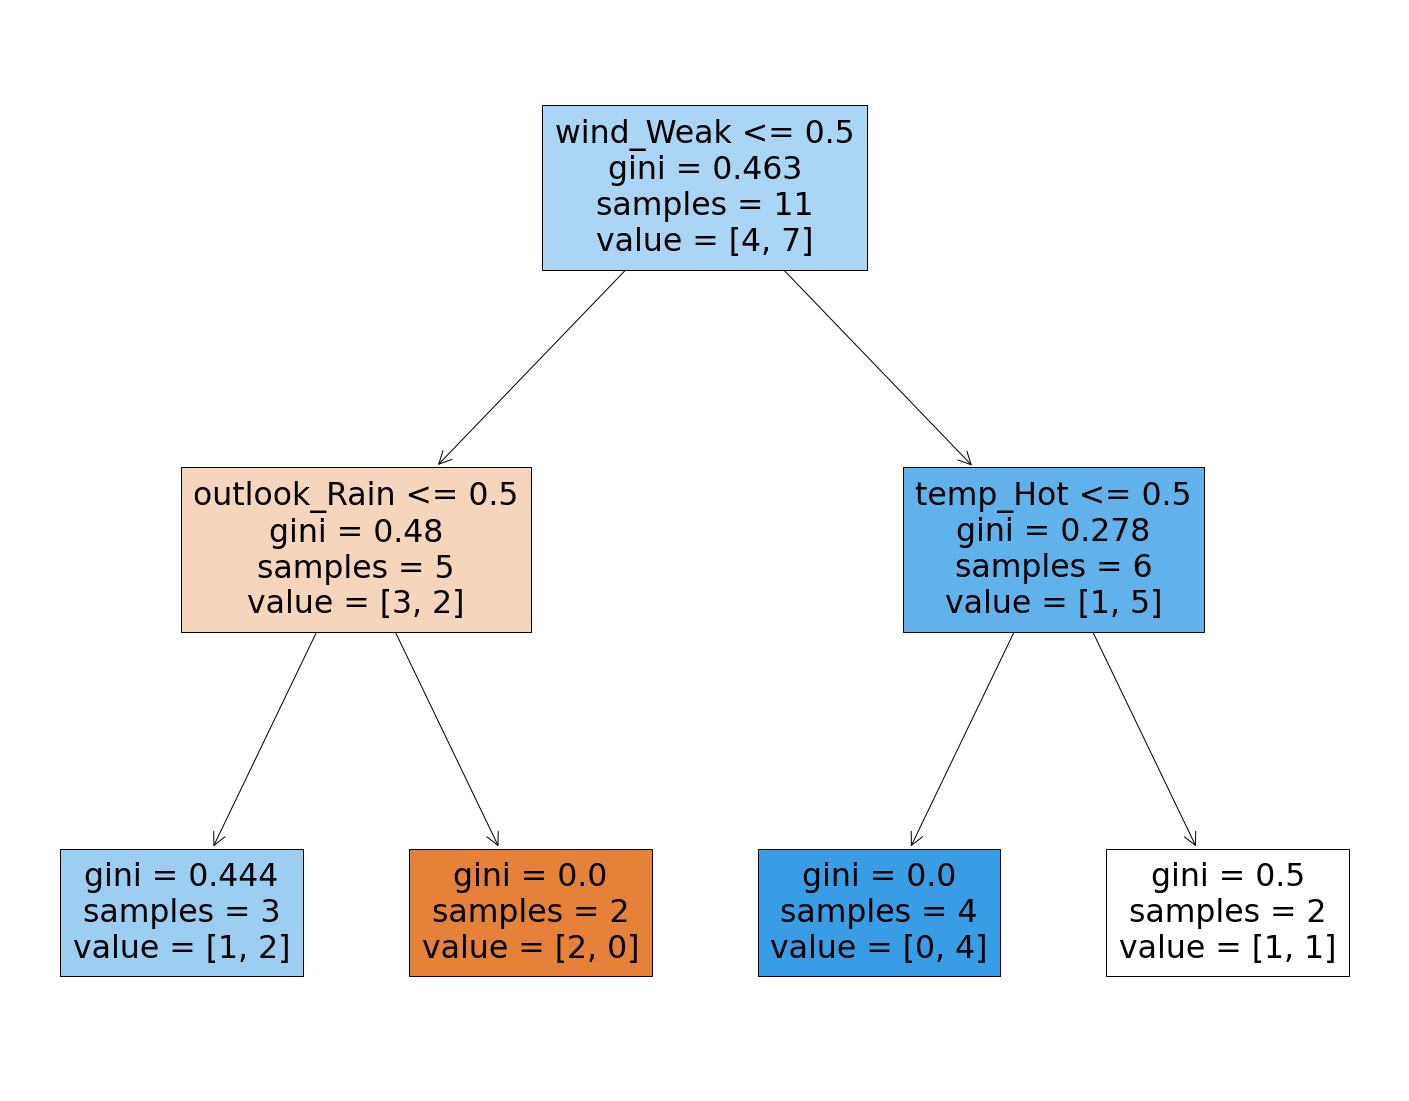

In [57]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,
                   filled=True)

## min_samples_split 
- The minimum number of samples(rows) a node must contain in order to consider splitting

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split = 3)

In [63]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=3)

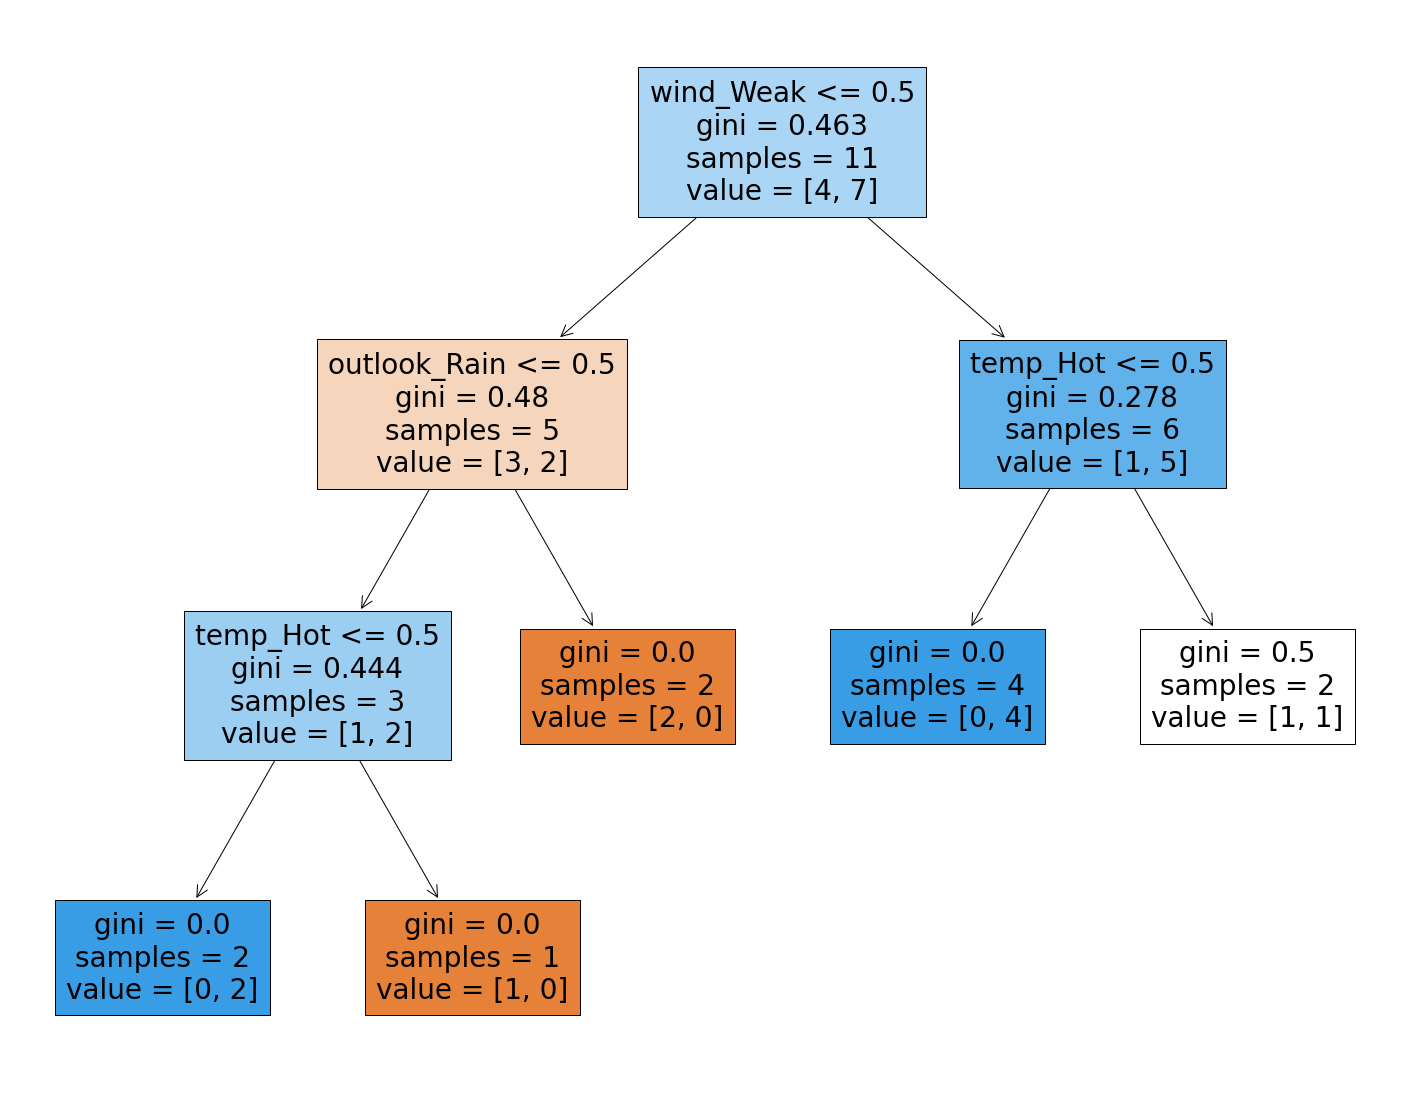

In [64]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,
                   filled=True)

## max_leaf_nodes

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_leaf_nodes = 3)

In [70]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

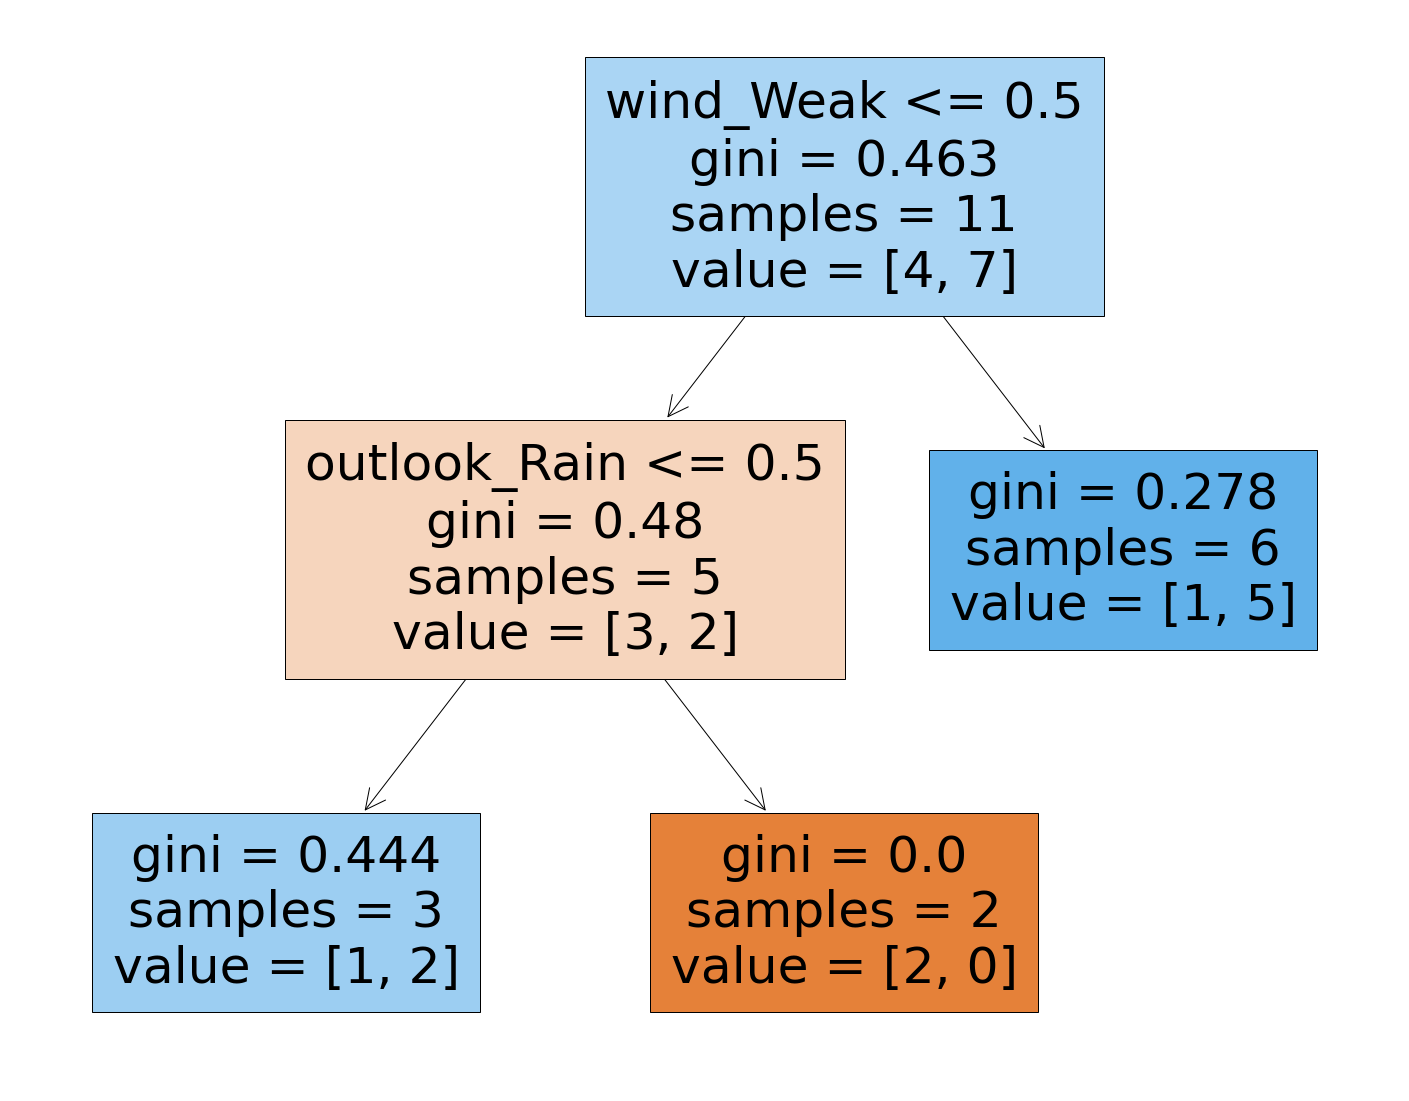

In [71]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,
                   filled=True)

## max_features

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_features = 2)

In [76]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_features=2)

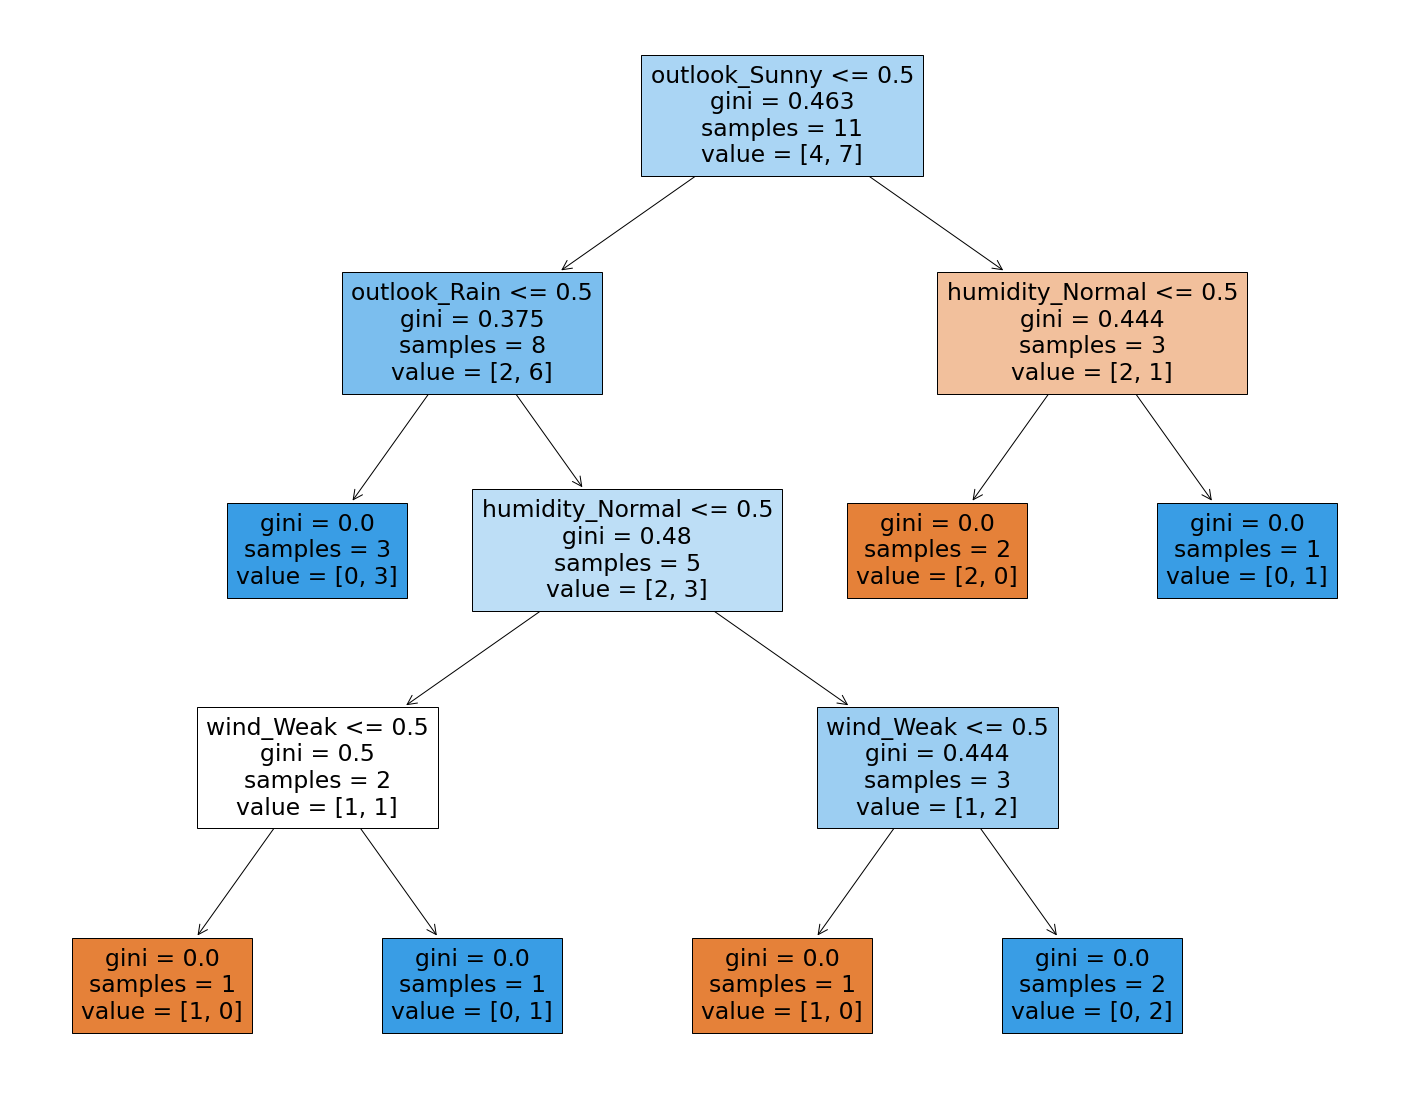

In [77]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,
                   filled=True)